<a href="https://colab.research.google.com/github/Vishal-74/TitanicSurvivalProject/blob/main/Titanic_Survival_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
upload = files.upload()
dataset = pd.read_csv('tested.csv')
dataset.shape

Saving tested.csv to tested (1).csv


(418, 12)

# Data Preprocessing

In [ ]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
dataset = dataset.drop(columns = 'Cabin')

In [ ]:
dataset['Age'].fillna(dataset['Age'].mean(),inplace=True)

In [ ]:
dataset['Fare'].fillna(dataset['Fare'].mode()[0], inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [ ]:
dataset.drop(["PassengerId","Ticket", "Name"], axis=1, inplace=True)

In [ ]:
dataset.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,30.272590,0.447368,0.392344,35.560497
std,0.481622,0.841838,12.634534,0.896760,0.981429,55.857145
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Data Visualisation

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Embarked'}>, <Axes: >]], dtype=object)

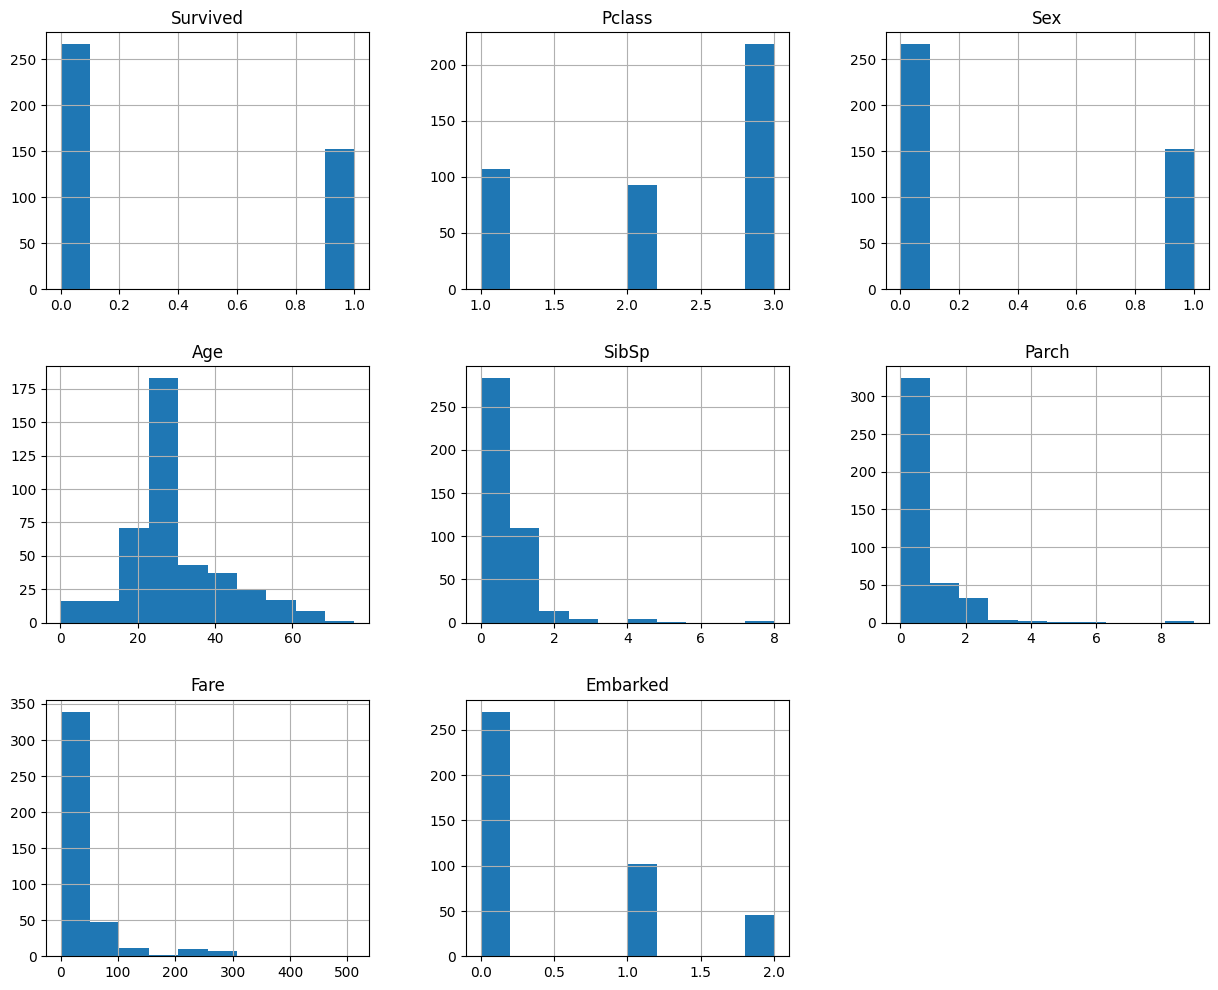

In [ ]:
dataset.hist(figsize=(15,12))

<Axes: xlabel='Survived', ylabel='count'>

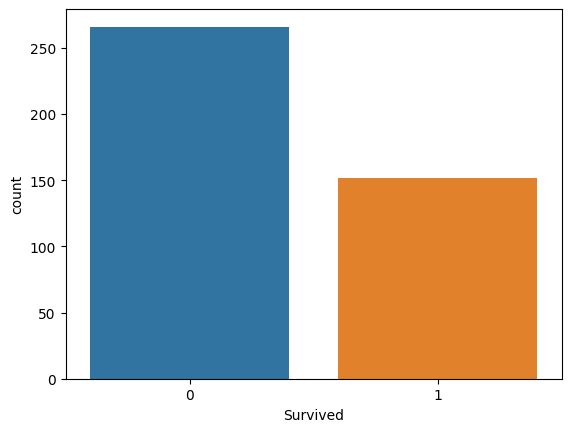

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x = 'Survived', data=dataset)

<Axes: xlabel='Sex', ylabel='count'>

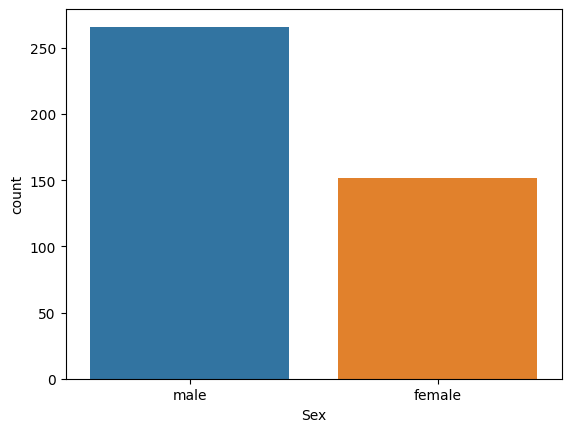

In [ ]:
sns.countplot(x='Sex',data=dataset)

<Axes: xlabel='Sex', ylabel='count'>

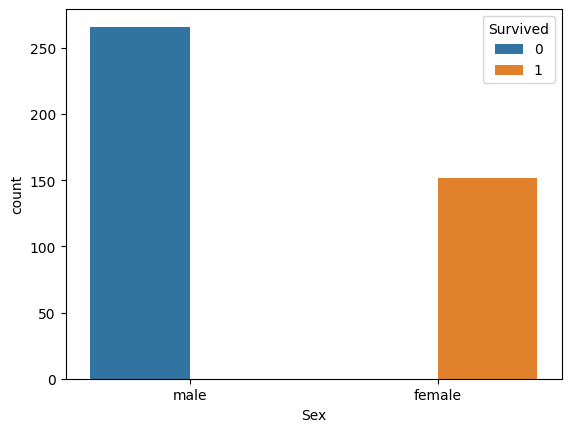

In [ ]:
sns.countplot(x='Sex',hue='Survived',data=dataset)

<Axes: xlabel='Pclass', ylabel='count'>

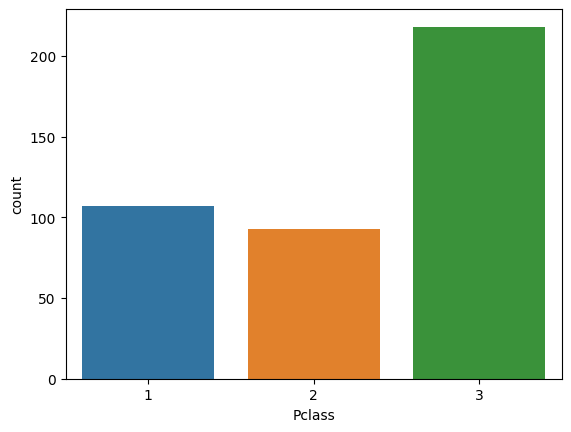

In [ ]:
sns.countplot(x = 'Pclass',data=dataset)

<Axes: xlabel='Pclass', ylabel='count'>

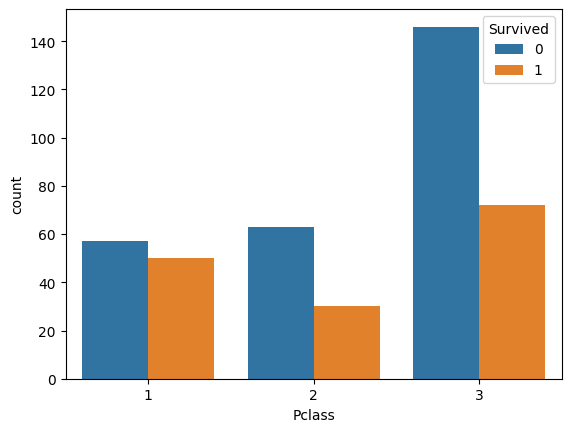

In [ ]:
sns.countplot(x='Pclass',hue='Survived',data=dataset)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [ ]:
dataset.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

<Axes: >

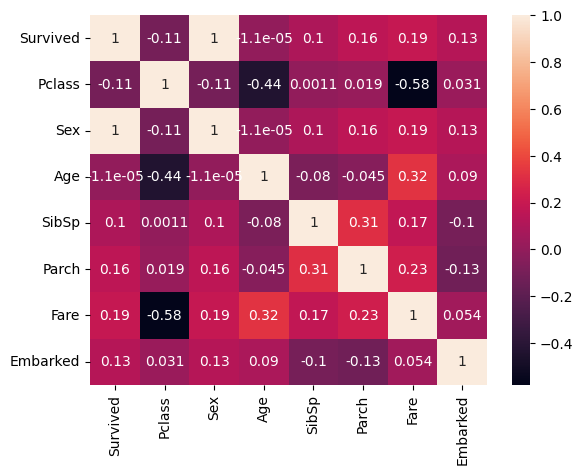

In [ ]:
  df = dataset.corr()
sns.heatmap(df,annot = True)

# Model Training
Logistic Regression

In [ ]:
X = dataset.drop(columns = 'Survived', axis=1)
Y = dataset['Survived']

In [ ]:
print(X )

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


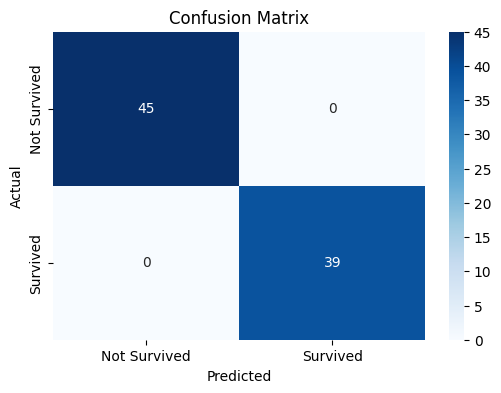

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
accuracy = accuracy_score(Y_test, Y_pred)*100
f1 = f1_score(Y_test, Y_pred)
print("F1 Score:", f1)
print("Model Accuracy:", accuracy)

F1 Score: 1.0
Model Accuracy: 100.0


# Evaluation metrics used :
The metrics such as accuracy, precision, and F1 score, are primarily used for classification tasks where the goal is to classify data into discrete classes (e.g., Yes/No, Positive/Negative).

**confusion matrix** is a table that allows you to visualize the performance of your model by comparing its predictions against the actual class labels in a classification problem.

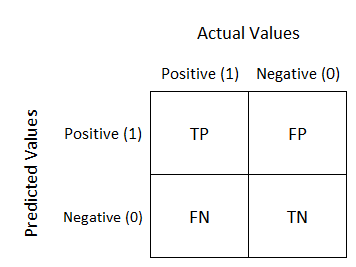



1.   True Positives (TP): These are instances that were correctly predicted as positive (e.g., correctly predicting that a patient has a disease).
2.   False Positives (FP): These are instances that were incorrectly predicted as positive when they are actually negative (e.g., incorrectly predicting that a healthy patient has a disease). FP represents Type I errors.
3.   False Negatives (FN): These are instances that were incorrectly predicted as negative when they are actually positive (e.g., incorrectly predicting that a patient with a disease is healthy). FN represents Type II errors.
4.   True Negatives (TN): These are instances that were correctly predicted as negative (e.g., correctly predicting that a healthy patient is indeed healthy).



**Accuracy** provides a measure of how well your model is performing overall.


1.   High --> more correct predictions
2.   Low --> more incorrect predictions

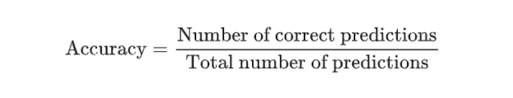


**F1 Score** combines precision and recall into a single value, providing a harmonic mean that balances both aspects of a model's performance.

1.   F1 Score = 1 -->  no errors in classifying positive and negative instances.
2.   F1 Score ~ 0.5 --> correctly classify a moderate number of positive instances while still minimizing false positives and false negatives.
3.   F1 Score = 0 --> model is not effectively classifying positive instances (low recall) or is producing a high number of false positives (low precision).




**Accuracy**: Accuracy measures the proportion of correctly classified instances (both survived and not survived) out of all instances. It provides an overall view of how well the model performs.

**Precision**: Precision is the ratio of true positives to the total number of predicted positive instances. It measures the model's ability to correctly identify survivors among the instances it predicted as survivors. High precision indicates few false positives.

**Recall** (Sensitivity or True Positive Rate): Recall is the ratio of true positives to the total number of actual positive instances (i.e., all survivors). It measures the model's ability to correctly identify survivors out of all actual survivors. High recall indicates that most survivors are correctly identified.

**F1 Score**: The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is particularly useful when you want to balance false positives and false negatives.

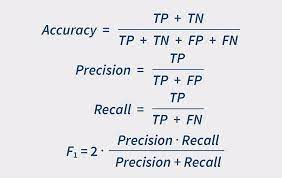

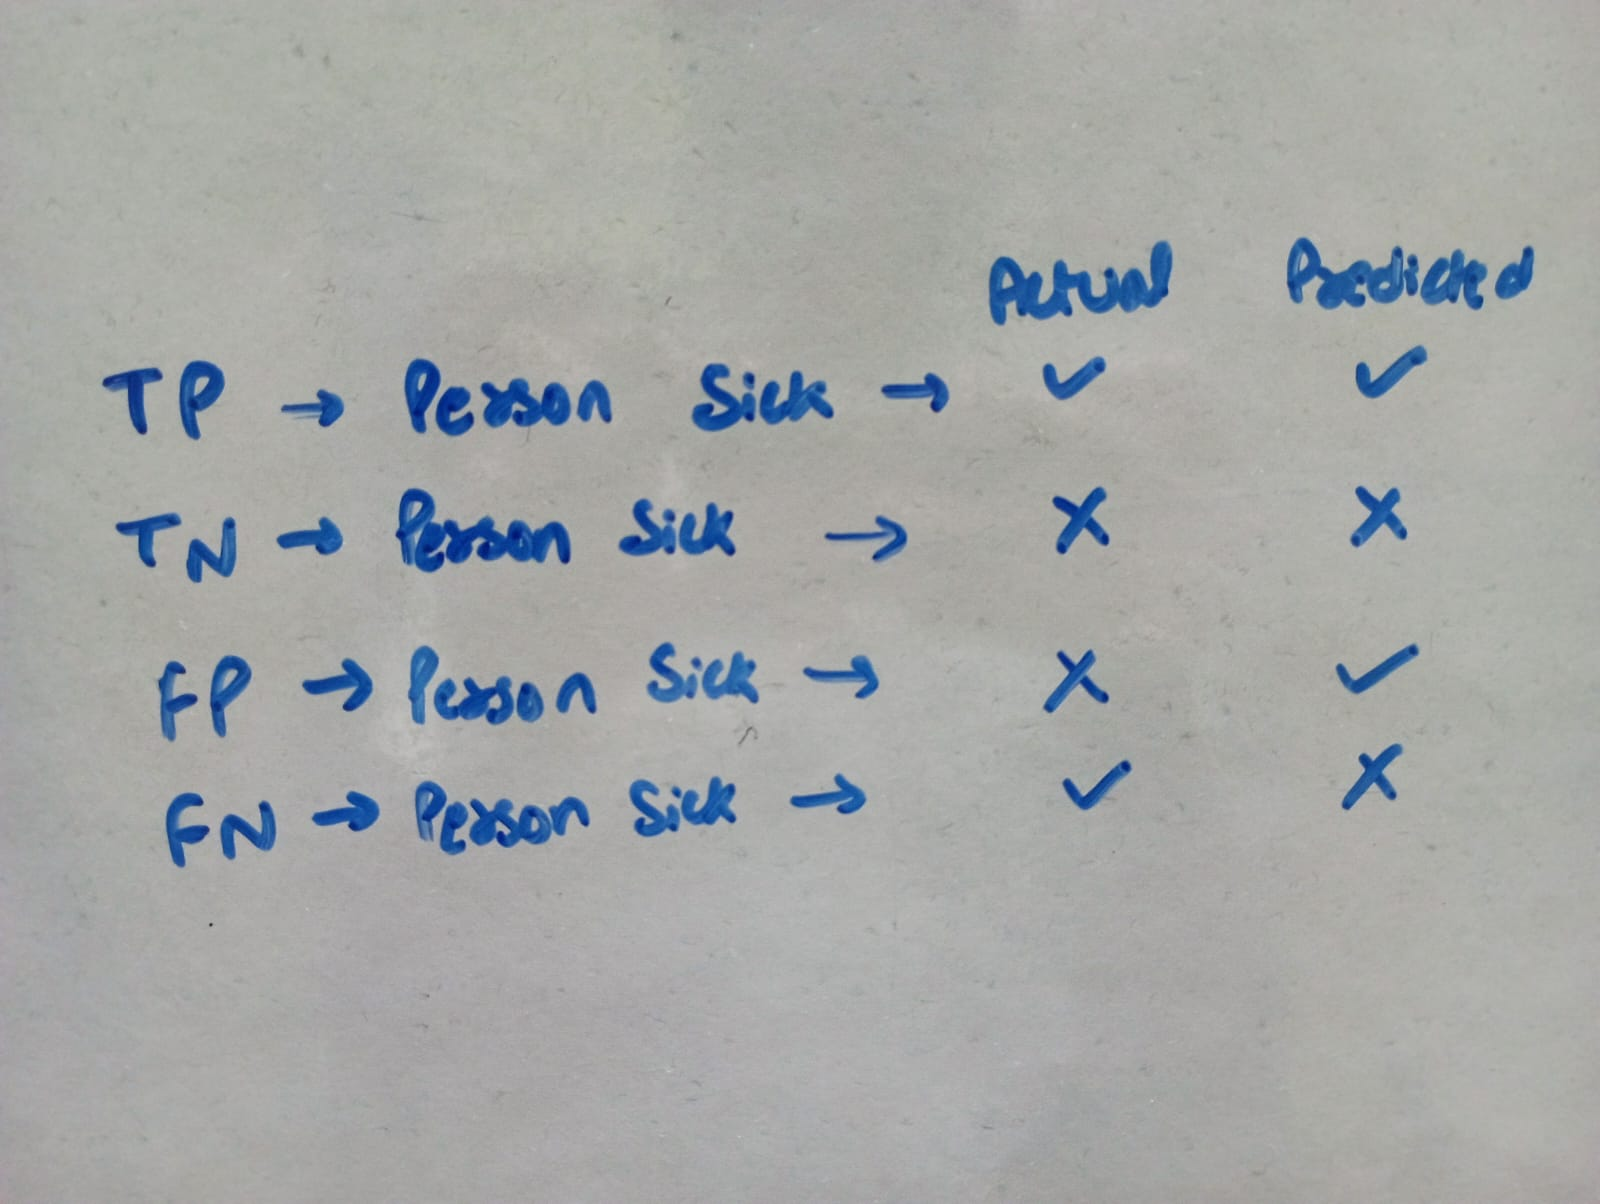

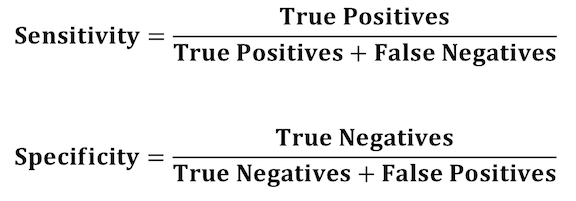